In [31]:
#import modules
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.pyplot import figure, show, xlim, ylim
from scipy.integrate import simps
from scipy.interpolate import interp1d

In [3]:
#galaxy template
tau0 = 0.5 #Gyr
stelmass0 = 10**9 #Msol
galage0 = 0.5e9 #Gyr
metal0 = 0.0196 #±0.0014 https://arxiv.org/abs/1703.10834
AV0 = 0
logage = np.log10(galage0)

In [5]:
data4color = np.genfromtxt('Template11.txt', unpack=True) #extract data from 4color as txt file
row = np.where(data4color[0]==8.706548) #find index row where age is equal to template
i = row[0][0] #get integer from that row
Mtemp = data4color[10,i] #total stellar mass of template in normalised solar masses
print(Mtemp)

0.46309


In [20]:
data_age_extr = np.genfromtxt('Template11age_extr.txt', unpack=True) #extract data from age.extr as txt file
Lumtemp = data_age_extr[1] #extract luminosity
wavel = data_age_extr[0]
Mpet = 5*10**8 #stellar mass pet galaxy in solar masses
Lumnorm = Lumtemp/Mtemp*Mpet #normalise luminosites
print(Lumnorm)

[1.28841046e+04 1.47325574e+04 1.57528774e+04 ... 3.80789911e-03
 2.05316461e-03 1.20214213e-03]


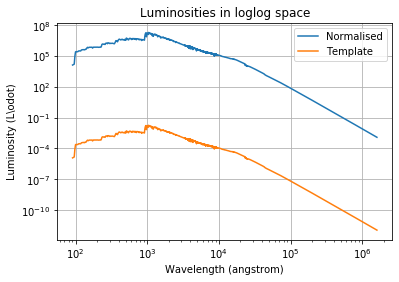

In [21]:
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.loglog(wavel, Lumnorm, label = "Normalised")
frame.loglog(wavel, Lumtemp, label = "Template")
frame.set_xlabel('Wavelength (angstrom)')
frame.set_ylabel('Luminosity (L\odot)')
frame.set_title('Luminosities in loglog space')
frame.grid()
frame.legend()
show()

In [43]:
curve_F775W = np.loadtxt("HST_ACS_WFC.F775W.dat")
curve_F160W = np.loadtxt("HST_WFC3_IR.F160W.dat")
wavel_F775W = curve_F775W[:,0]
trans_F775W = curve_F775W[:,1]
wavel_F160W = curve_F160W[:,0]
trans_F160W = curve_F160W[:,1]

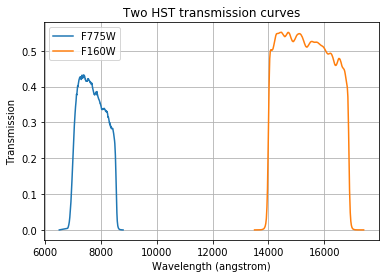

In [44]:
#transmission curves
fig = figure()
frame = fig.add_subplot(1,1,1)
frame.plot(wavel_F775W, trans_F775W, label = "F775W")
frame.plot(wavel_F160W, trans_F160W, label = "F160W")
frame.set_xlabel('Wavelength (angstrom)')
frame.set_ylabel('Transmission')
frame.set_title('Two HST transmission curves')
frame.grid()
frame.legend()
show()

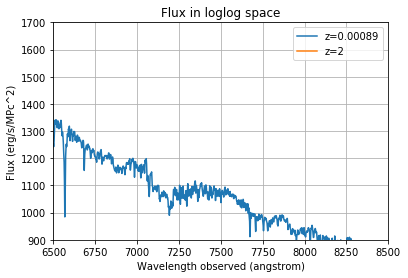

In [33]:
#4a
dL = 3.8 #MPc
z1 = 0.00089 
z2 = 2
flux1 = Lumnorm/((1+z1)*4*np.pi*dL**2)
flux2 = Lumnorm/((1+z2)*4*np.pi*dL**2)
wavelobs = wavel*(1+z1)

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.plot(wavelobs, flux1, label = f'z={z1}')
frame.plot(wavelobs, flux2, label = "z=2")
frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/MPc^2)')
frame.set_title('Flux in loglog space')
frame.grid()
xlim(6500,8500)
ylim(900,1700)
frame.legend()
show()

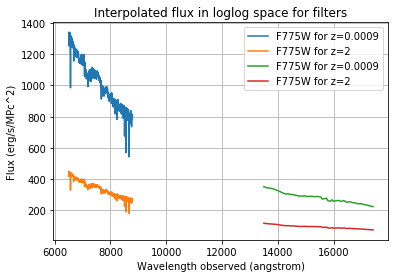

In [46]:
finterp1 = interp1d(wavelobs, flux1)
finterp2 = interp1d(wavelobs, flux2)
f1_F775W = finterp1(wavel_F775W)
f2_F775W = finterp2(wavel_F775W)
f1_F160W = finterp1(wavel_F160W)
f2_F160W = finterp2(wavel_F160W)

fig = figure()
frame = fig.add_subplot(1,1,1)
frame.plot(wavel_F775W, f1_F775W, label = f'F775W for z={z1:.4f}')
frame.plot(wavel_F775W, f2_F775W, label = f'F775W for z=2')
frame.plot(wavel_F160W, f1_F160W, label = f'F775W for z={z1:.4f}')
frame.plot(wavel_F160W, f2_F160W, label = f'F775W for z=2')

frame.set_xlabel('Wavelength observed (angstrom)')
frame.set_ylabel('Flux (erg/s/MPc^2)')
frame.set_title('Interpolated flux in loglog space for filters')
frame.grid()
frame.legend()
show()

In [52]:
#using simspons rule to determine the convolution integrals
convol1_F775W = simps(f1_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)
convol2_F775W = simps(f2_F775W*trans_F775W, wavel_F775W)/simps(trans_F775W, wavel_F775W)
convol1_F160W = simps(f1_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)
convol2_F160W = simps(f2_F160W*trans_F160W, wavel_F160W)/simps(trans_F160W, wavel_F160W)

print(convol1_F775W)
print(convol2_F775W)
print(convol1_F160W)
print(convol2_F160W)

c = 3e18 #speed of ligh in angstrom/s
fluxnu1_F775W=convol1_F775W*abs(np.max(wavel_F775W)-np.min(wavel_F775W))/abs(c/np.max(wavel_F775W)-c/np.min(wavel_F775W))
print(fluxnu1_F775W)

994.2556453670031
331.7135109637932
281.2665805221822
93.83896925961568
1.8940027843496133e-08
